In [19]:
# --- matplotlib --------------------------------------------------------------
import matplotlib.pyplot as plt

# --- numpy -------------------------------------------------------------------
import numpy as np

# --- LMFIT -------------------------------------------------------------------
from lmfit import Parameters, minimize, report_fit
from lmfit.models import ConstantModel, GaussianModel, LinearModel, VoigtModel
from lmfit import CompositeModel, Model

# --- Our own modules ---------------------------------------------------------
import sys

# permatent location of functions from pyFitXPS
sys.path.insert(0, '/home/julio/Python/pyFitXPS/pyfitxps/') # Julio Laptop
#sys.path.insert(0, '/Users/ceciliapatrault/Desktop/Julio/XPS_PYTHON/paquetes_funciones') # Mac
import specs_xy as sp
import fitxps

In [20]:
folder_path = "data/separated/"

Au_MeMBA_5min = sp.load_all_files_xy_in(folder_path)

Au_MeMBA_5min.keys()

dict_keys(['VB (3)', 'S (3)', 'C (1)', 'O (2)', 'VB (0)', 'O (3)', 'C (0)', 'VB (1)', 'VB (2)', 'C (3)', 'C (2)', 'S (0)', 'O (0)', 'Au (0)', 'Au (1)', 'Au (3)', 'O (1)', 'Survey (0)', 'S (2)', 'S (1)', 'Au (2)'])

In [21]:
Au_MeMBA_5min['VB (0)']['details']

{'Region': 'VB (0)',
 'Acquisition Date': '06/10/22 18:32:46 UTC',
 'Analysis Method': 'XPS',
 'Analyzer Lens': 'MediumArea:3.5kV',
 'Analyzer Slit': '5:7x20\\B:open',
 'Scan Mode': 'FixedAnalyzerTransmission',
 'Curves/Scan': 1,
 'Values/Curve': 281,
 'Dwell Time': 0.1,
 'Excitation Energy': 1486.71,
 'Binding Energy': 12.0,
 'Pass Energy': 20.0,
 'Bias Voltage': 90.0,
 'Detector Voltage': 1750.0,
 'Eff. Workfunction': 4.341,
 'Source': 'Focus',
 'Comment': 'sin irradiar',
 'Number of Scans': 10}

In [22]:
type(Au_MeMBA_5min.keys())

dict_keys

In [23]:
list(Au_MeMBA_5min.keys())

['VB (3)',
 'S (3)',
 'C (1)',
 'O (2)',
 'VB (0)',
 'O (3)',
 'C (0)',
 'VB (1)',
 'VB (2)',
 'C (3)',
 'C (2)',
 'S (0)',
 'O (0)',
 'Au (0)',
 'Au (1)',
 'Au (3)',
 'O (1)',
 'Survey (0)',
 'S (2)',
 'S (1)',
 'Au (2)']

In [24]:
# para ordenar la keys del diccionario, y generar una lista
sorted_dict = sorted( Au_MeMBA_5min.keys() )

# print(type(sorted_VB),sorted_VB)
sorted_dict

['Au (0)',
 'Au (1)',
 'Au (2)',
 'Au (3)',
 'C (0)',
 'C (1)',
 'C (2)',
 'C (3)',
 'O (0)',
 'O (1)',
 'O (2)',
 'O (3)',
 'S (0)',
 'S (1)',
 'S (2)',
 'S (3)',
 'Survey (0)',
 'VB (0)',
 'VB (1)',
 'VB (2)',
 'VB (3)']

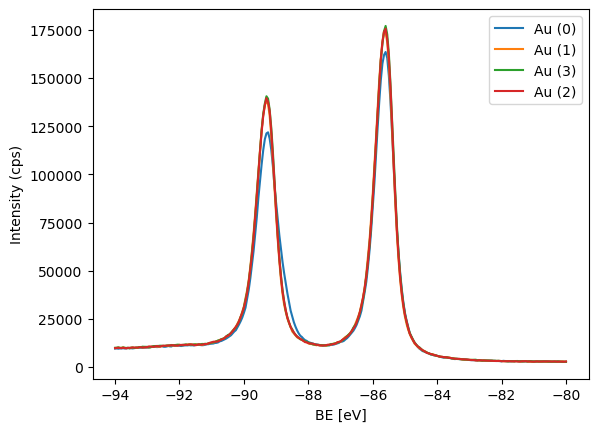

In [25]:
sp.plot_region(Au_MeMBA_5min,'Au','BE')

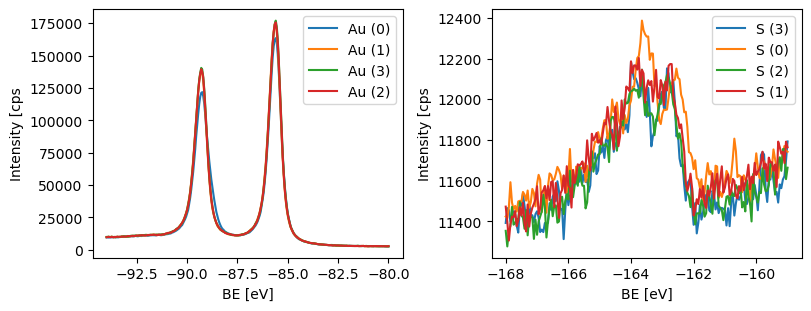

In [26]:
all_regio_to_plot = ['Au','S ']

exper_dict = Au_MeMBA_5min

energy_scale = 'BE'


sp.plot_all_regions_in(exper_dict,all_regio_to_plot,energy_scale)

# Fit

[[Model]]
    (Model(linear, prefix='bkgl_') + Model(doublet_nf, prefix='pDS_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 64
    # data points      = 178
    # variables        = 6
    chi-square         = 1.0043e+09
    reduced chi-square = 5839120.88
    Akaike info crit   = 2779.15271
    Bayesian info crit = 2798.24341
[[Variables]]
    bkgl_slope:     -556.512747 +/- 71.0263238 (12.76%) (init = 1)
    bkgl_intercept: -44927.7333 +/- 6232.01052 (13.87%) (init = 1000)
    pDS_sos:         3.63583815 +/- 0.00369273 (0.10%) (init = 3.65)
    pDS_intercept:   0 (fixed)
    pDS_slope:       0 (fixed)
    pDS_lw:          0.317 (fixed)
    pDS_asym:        0.054 (fixed)
    pDS_gw:          0.52147623 +/- 0.00571723 (1.10%) (init = 0.5)
    pDS_int:         273288.759 +/- 1560.99359 (0.57%) (init = 100000)
    pDS_e:          -85.6090681 +/- 0.00222502 (0.00%) (init = -85.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(bkgl_slope, bkgl_

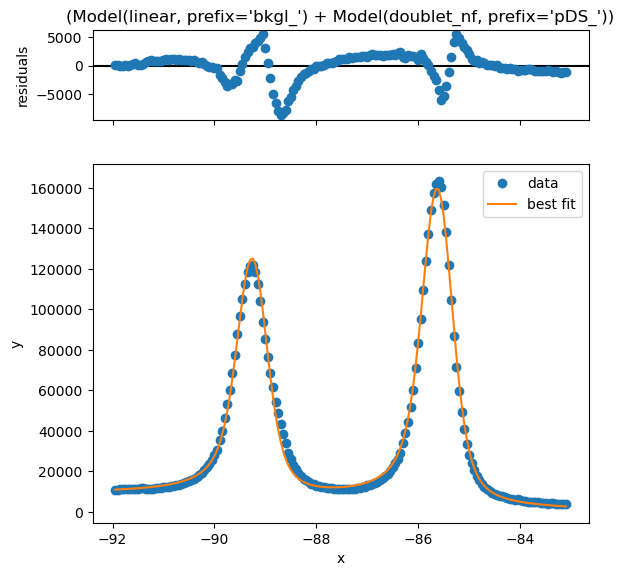

In [36]:
region = 'Au (0)'

exper_dict = Au_MeMBA_5min

energy_scale = 'BE'
xmin = -92
xmax = -83

sos = 3.65

# create data from broadened step
def fit_all_Au4f_in(exper_dict, region, sos, energy_scale, xmin, xmax):
    x_full = exper_dict[region]['data_orig'][energy_scale]
    y_full = exper_dict[region]['data_orig']['intensity']

# range of data to be fitted

    index_xmin = np.min(np.where(x_full > xmin))
    index_xmax = np.max(np.where(x_full < xmax))

    x = x_full[index_xmin:index_xmax]
    y = y_full[index_xmin:index_xmax]

    bkgl = LinearModel(independent_vars=['x'], prefix='bkgl_')

    pDS = Model(fitxps.doublet_nf, independent_vars=['x'], prefix='pDS_')

    mod = bkgl + pDS

    pars = mod.make_params()

# parameters

    pars['bkgl_intercept'].set(value=1000)
    pars['bkgl_slope'].set(value=1)

# sos=3.65,bg0=0.,bg1=0.,l=0.317,a=0.054,g=0.5,i=100000,e=-85.3
    pars['pDS_sos'].set(value=3.65, vary=True)
    pars['pDS_intercept'].set(value=0, vary=False)
    pars['pDS_slope'].set(value=0, vary=False)
    pars['pDS_lw'].set(value=0.317, vary=False)
    pars['pDS_asym'].set(value=0.054, vary=False)
    pars['pDS_gw'].set(value=0.5, min=0.3, max=1.1)
    pars['pDS_int'].set(value=100000, min=0)
    pars['pDS_e'].set(value=-85.3)

# fit this model to data array y
    result = mod.fit(y, params=pars, x=x)

    exper_dict[region].update({'results': result})

    result.plot()

    print(result.fit_report())

fit_all_Au4f_in(exper_dict, region, sos, energy_scale, xmin, xmax)

[[Model]]
    (Model(linear, prefix='bkgl_') + Model(doublet_nf, prefix='pDS_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 64
    # data points      = 178
    # variables        = 6
    chi-square         = 1.0043e+09
    reduced chi-square = 5839120.88
    Akaike info crit   = 2779.15271
    Bayesian info crit = 2798.24341
[[Variables]]
    bkgl_slope:     -556.512747 +/- 71.0263238 (12.76%) (init = 1)
    bkgl_intercept: -44927.7333 +/- 6232.01052 (13.87%) (init = 1000)
    pDS_sos:         3.63583815 +/- 0.00369273 (0.10%) (init = 3.65)
    pDS_intercept:   0 (fixed)
    pDS_slope:       0 (fixed)
    pDS_lw:          0.317 (fixed)
    pDS_asym:        0.054 (fixed)
    pDS_gw:          0.52147623 +/- 0.00571723 (1.10%) (init = 0.5)
    pDS_int:         273288.759 +/- 1560.99359 (0.57%) (init = 100000)
    pDS_e:          -85.6090681 +/- 0.00222502 (0.00%) (init = -85.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(bkgl_slope, bkgl_

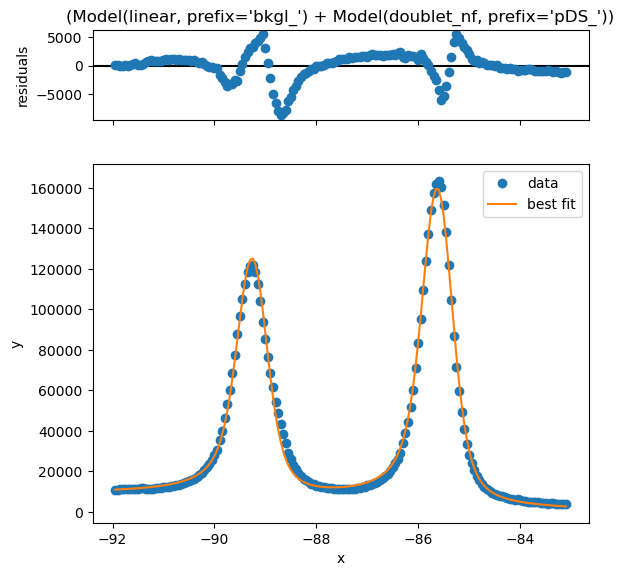

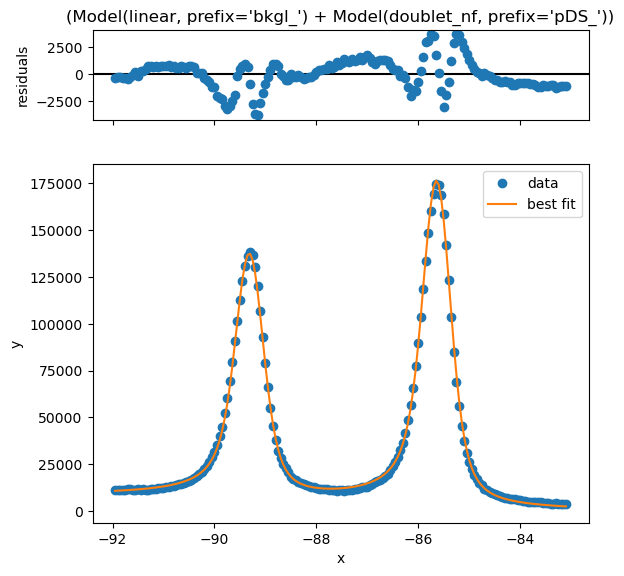

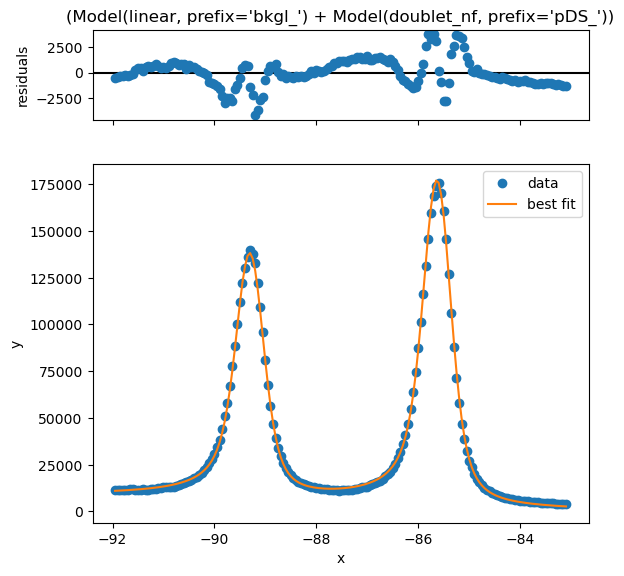

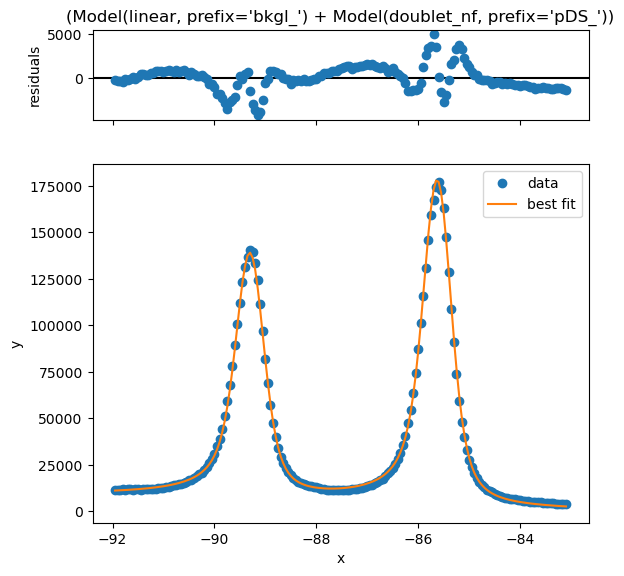

In [38]:
list_of_regions = ['Au (0)', 'Au (1)', 'Au (2)', 'Au (3)']

for region in list_of_regions:
    fit_all_Au4f_in(Au_MeMBA_5min,region, 3.65,'BE', -92,-83)

In [41]:
Au_MeMBA_5min['Au (0)']['results'].best_values['pDS_e']

-85.6090680867744

In [48]:
Au4f_e = []

for Au in list_of_regions:
    e = Au_MeMBA_5min[Au]['results'].best_values['pDS_e']
    Au4f_e.append(round(e,3))

Au4f_e

[-85.609, -85.624, -85.615, -85.611]

In [47]:
Au4f_gw = []

for Au in list_of_regions:
    e = Au_MeMBA_5min[Au]['results'].best_values['pDS_gw']
    Au4f_gw.append(round(e,3))

Au4f_gw

[0.521, 0.47, 0.465, 0.468]